# Compute Top Authors 

In this notebook, we demonstrate how `AuthorRank` can be applied on a dataset to compute the top authors and show a simple visualization of the result. 

## Imports 

Let's ensure we are using the environment we'd like to use and then import the necessary libraries. 

In [3]:
import sys
sys.executable

'/usr/local/bin/python3.7'

In [4]:
from AuthorRank.graph import create
from AuthorRank.score import top_authors
from collections import Counter
import json
import matplotlib.pyplot as plt
import networkx as nx

## Read Data 

Let's read in the sample data from the repository for processing and visualization. 

In [5]:
# read in sample json
with open("../data/author_network.json", 'r') as f:
    data = json.load(f)

## Examine the Data 

In [6]:
data

{'documents': [{'title': 'Detecting spacecraft anomalies using lstms and nonparametric dynamic thresholding',
   'authors': [{'first_name': 'Kyle',
     'last_name': 'Hundman',
     'affiliation': {'name': 'NASA Jet Propulsion Laboratory',
      'department': 'Office of the Chief Information Officer'}},
    {'first_name': 'Valentino',
     'last_name': 'Constantinou',
     'affiliation': {'name': 'NASA Jet Propulsion Laboratory',
      'department': 'Office of the Chief Information Officer'}},
    {'first_name': 'Christopher',
     'last_name': 'Laporte',
     'affiliation': {'name': 'NASA Jet Propulsion Laboratory',
      'department': 'Office of the Chief Information Officer'}},
    {'first_name': 'Ian',
     'last_name': 'Colwell',
     'affiliation': {'name': 'NASA Jet Propulsion Laboratory',
      'department': 'Office of the Chief Information Officer'}},
    {'first_name': 'Tom',
     'last_name': 'Soderstrom',
     'affiliation': {'name': 'NASA Jet Propulsion Laboratory',
      

In [7]:
# total number of documents 
len(data['documents'])

6

In [8]:
# count of each author
authors = [tuple((item['first_name'], item['last_name'])) for sublist in data['documents'] for item in sublist['authors']]
counts = Counter(authors)
counts

Counter({('Kyle', 'Hundman'): 5,
         ('Valentino', 'Constantinou'): 2,
         ('Christopher', 'Laporte'): 1,
         ('Ian', 'Colwell'): 1,
         ('Tom', 'Soderstrom'): 1,
         ('Thamme', 'Gowda'): 2,
         ('Mayank', 'Kejriwal'): 1,
         ('Benedikt', 'Boecking'): 1,
         ('Chris', 'Mattmann'): 3,
         ('Jason', 'Hyon'): 1,
         ('Paul', 'Ramirez'): 1})

In [9]:
# total number of unique authors 
len(counts)

11

## Compute Top Authors 

Use the AuthorRank approach to compute the top authors for this set of documents (corpora). While AuthorRank is applied here more generally across a document set with various topics, it can also be applied on documents representing a particular topic. We will specify a normalization of the scores to a scale between 0 and 1 (inclusive) to aid in interpretation of the result. 

In [10]:
# get the top authors for a set of documents
top = top_authors(documents=data['documents'], normalize_scores=True, n=11)

In [11]:
# print the results
for i, j in zip(top[0], top[1]):
    print(i, j)

('Kyle', 'Hundman') 0.9999999999999998
('Chris', 'Mattmann') 0.4999999999999996
('Thamme', 'Gowda') 0.24999999999999983
('Valentino', 'Constantinou') 0.24999999999999983
('Benedikt', 'Boecking') 0.0
('Christopher', 'Laporte') 0.0
('Ian', 'Colwell') 0.0
('Jason', 'Hyon') 0.0
('Mayank', 'Kejriwal') 0.0
('Paul', 'Ramirez') 0.0
('Tom', 'Soderstrom') 0.0


## Compute the Graph 

We will want to retrieve the graph as well for visualization, so we generate the graph (which is a [NetworkX](https://networkx.github.io/) graph). 

In [12]:
# generate a graph
G = create(documents=data['documents'])

In [13]:
# number of co-authorship connections in the graph (network)
len(G.edges)

114

{('Benedikt',
  'Boecking'): Text(1.0, -1.6255812695931127e-08, "('Benedikt', 'Boecking')"),
 ('Chris',
  'Mattmann'): Text(0.8412535190582275, 0.5406407713890076, "('Chris', 'Mattmann')"),
 ('Christopher',
  'Laporte'): Text(0.41541504859924316, 0.9096319675445557, "('Christopher', 'Laporte')"),
 ('Ian',
  'Colwell'): Text(-0.1423148214817047, 0.9898214340209961, "('Ian', 'Colwell')"),
 ('Jason',
  'Hyon'): Text(-0.6548606753349304, 0.7557496428489685, "('Jason', 'Hyon')"),
 ('Kyle',
  'Hundman'): Text(-0.9594929814338684, 0.28173258900642395, "('Kyle', 'Hundman')"),
 ('Mayank',
  'Kejriwal'): Text(-0.9594929814338684, -0.28173258900642395, "('Mayank', 'Kejriwal')"),
 ('Paul',
  'Ramirez'): Text(-0.6548607349395752, -0.7557495832443237, "('Paul', 'Ramirez')"),
 ('Thamme',
  'Gowda'): Text(-0.14231500029563904, -0.9898214340209961, "('Thamme', 'Gowda')"),
 ('Tom',
  'Soderstrom'): Text(0.41541510820388794, -0.9096319675445557, "('Tom', 'Soderstrom')"),
 ('Valentino',
  'Constantinou'):

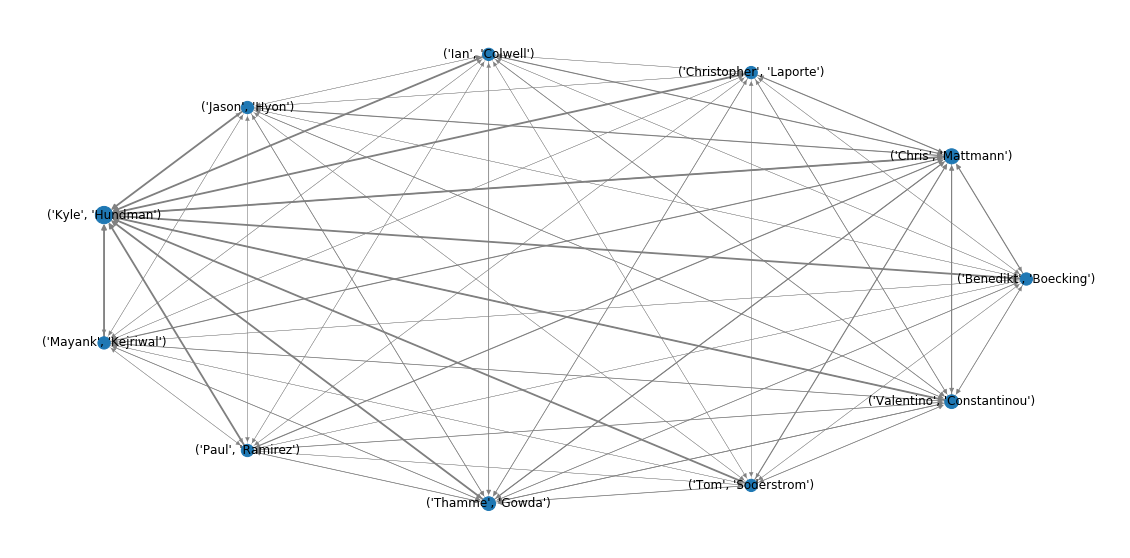

In [32]:
plt.figure(figsize=(20,10))
plt.axis('off')
pos = nx.shell_layout(G)
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]
edgewidth = [0.15*d for d in edgewidth]
author_scores = list()
for i in G.nodes:
    index = top[0].index(i)
    author_scores.append(top[1][index])
nx.draw_networkx_nodes(G, pos, node_size=[(i+1)*150 for i in author_scores])
nx.draw_networkx_edges(G, pos, width=edgewidth, edge_color="grey")
nx.draw_networkx_labels(G, pos=pos)